# Neo4j

Examples adapted from http://nicolewhite.github.io/neo4j-jupyter/

## Using py2neo to connect to Neo4j and clear the database

In [1]:
from py2neo import Graph
graph = Graph("bolt://127.0.0.1:7687")
graph.delete_all()

print("Number of nodes: {} ".format(len(graph.nodes)))
print("Number of relationships: {} ".format(len(graph.nodes)))

Number of nodes: 0 
Number of relationships: 0 


## Querying via ipython-cypher 

In [2]:
%load_ext cypher

### Nodes

In [3]:
%%cypher
CREATE (person1:Person {name:'Asdrubal'}),
       (person2:Person {name:'Marcos'}   )

2 nodes created.
2 properties set.
2 labels added.


[]

### Relationships

In [4]:
%%cypher
CREATE (person1:Person {name:'Matheus'})-[:LIKES]->(movie1:Movie {title:'Inglourious Basterds', year:2009}),
       (person2:Person {name:'Lais'}   )-[:LIKES]->(movie1)

3 nodes created.
4 properties set.
2 relationships created.
3 labels added.


[]

### Querying

In [5]:
%%cypher
MATCH (person:Person)-[:LIKES]->(movie:Movie)
RETURN person.name as person_name, movie

2 rows affected.


person_name,movie
Lais,"{'year': 2009, 'title': 'Inglourious Basterds'}"
Matheus,"{'year': 2009, 'title': 'Inglourious Basterds'}"


In [6]:
%%cypher
MATCH (person:Person)-[:LIKES]->(movie:Movie)
WHERE  person.name = 'Matheus'
RETURN person.name as person_name, movie.title

1 rows affected.


person_name,movie.title
Matheus,Inglourious Basterds


## Visualizing the graph

In [7]:
import sys
sys.path.insert(0, '../../resources/python/')
from datasci4health.graphdrawer.visgraph import draw

In [8]:
options = {}
draw(graph, options, physics=True)

In [9]:
options = {"Person": "name", "Movie": "title"}
draw(graph, options, physics=True)

## Programmatical querying via py2neo

In [10]:
from py2neo import Node, Relationship

### Nodes

In [11]:

nicole = Node("Person", name="Nicole", age=24)
drew = Node("Person", name="Drew", age=20)

mtdew = Node("Drink", name="Mountain Dew", calories=9000)
cokezero = Node("Drink", name="Coke Zero", calories=0)

coke = Node("Manufacturer", name="Coca Cola")
pepsi = Node("Manufacturer", name="Pepsi")

graph.create(nicole | drew | mtdew | cokezero | coke | pepsi)

In [12]:
options = {"Person": "name", "Drink": "name", "Manufacturer": "name", "Movie": "title"}
draw(graph, options, physics=True)

### Relationships

In [13]:
from py2neo import Relationship

graph.create(Relationship(nicole, "LIKES", cokezero))
graph.create(Relationship(nicole, "LIKES", mtdew))
graph.create(Relationship(drew, "LIKES", mtdew))
graph.create(Relationship(coke, "MAKES", cokezero))
graph.create(Relationship(pepsi, "MAKES", mtdew))

draw(graph, options, physics=True)

### py2neo cypher

In [14]:
query = """
MATCH (person:Person)-[:LIKES]->(drink:Drink)
RETURN person.name AS name, drink.name AS drink
"""

data = graph.run(query)

for d in data:
    print(d)

<Record name='Nicole' drink='Coke Zero'>
<Record name='Drew' drink='Mountain Dew'>
<Record name='Nicole' drink='Mountain Dew'>


## ipython-cypher + pandas

In [15]:
results = %cypher MATCH (person:Person)-[:LIKES]->(drink:Drink) \
                  RETURN person.name AS name, drink.name AS drink
    
df = results.get_dataframe()

df

3 rows affected.


,name,drink
0,Nicole,Coke Zero
1,Drew,Mountain Dew
2,Nicole,Mountain Dew


## ipython-cypher + networkx

3 rows affected.


/srv/conda/envs/notebook/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/srv/conda/envs/notebook/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


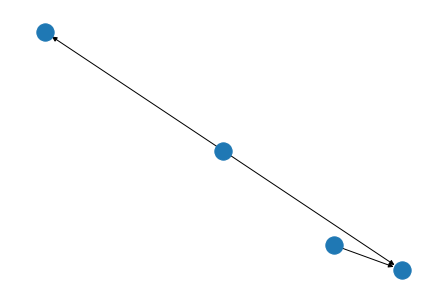

In [16]:
import networkx as nx
%matplotlib inline

results = %cypher MATCH p = (:Person)-[:LIKES]->(:Drink) RETURN p

g = results.get_graph()

nx.draw(g)

In [17]:
g.nodes(data=True)

NodeDataView({'25': {'name': 'Nicole', 'age': 24, 'labels': ['Person']}, '26': {'name': 'Coke Zero', 'calories': 0, 'labels': ['Drink']}, '24': {'name': 'Drew', 'age': 20, 'labels': ['Person']}, '27': {'name': 'Mountain Dew', 'calories': 9000, 'labels': ['Drink']}})

In [18]:
nx.degree(g)

DiMultiDegreeView({'25': 2, '26': 1, '24': 1, '27': 2})

## jgraph
http://patrickfuller.github.io/jgraph/examples/ipython.html